In [ ]:
# Sean Dougherty
# 03/15/2022
# this file reads in the output csv filed from agn_merger.py and does some preliminary visualization
# will later become a .py file for sharing and convinience

In [ ]:
# at the end of csv processing, we want a df with bins as columns and iterations as rows
# we want 3 of these: for pair AGN fraction, iso AGN fraction, and enhancement

In [4]:
# load libraries
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
from numpy import random
import matplotlib.pyplot as plt

import os

from time import sleep
from tqdm import tqdm

data_path = '/nobackup/c1029594/CANDELS_AGN_merger_data/agn_merger_output/'

## Checking pair and control galaxy mass and redshift distributions

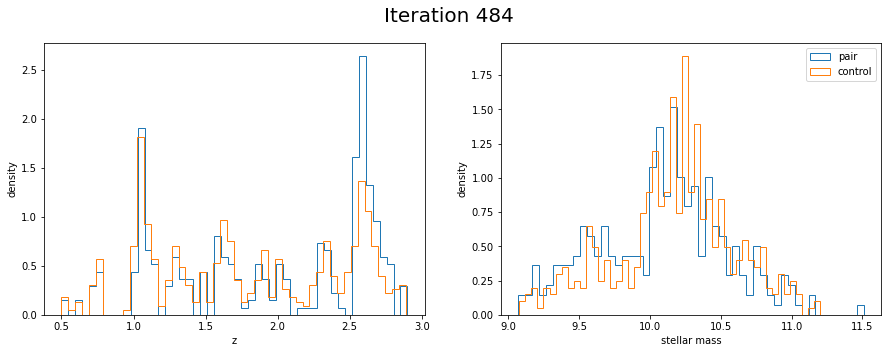

2.0149999999999997 1.7349999999999999


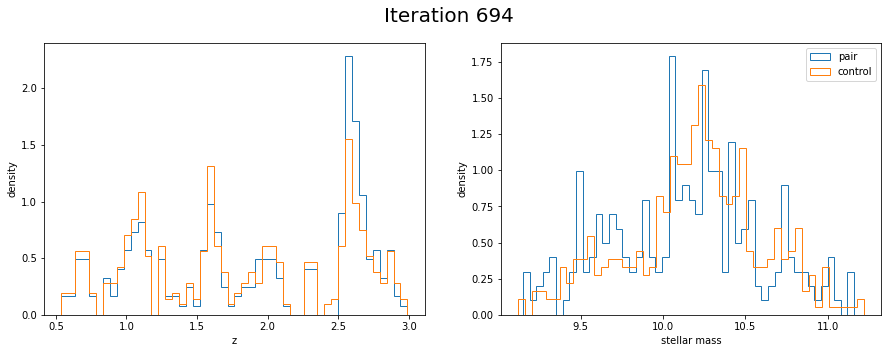

1.975 1.74


In [7]:
# do I want to do this by bin? or per iteration?
# probably best to just randomly choose 2 or 3 iterations to look at this for

#photo-specz_results/photo-specz_'

# generate a 2 random integers to look at distributions
idx = random.randint(len(os.listdir(data_path+'photoz_results/')), size=2)

# photo-specz_5.csv

# open each dataframe and plot distributions
for file_idx in idx:
    ran_df = pd.read_csv( data_path+'photoz_results/'+(os.listdir(data_path+'photoz_results/'))[file_idx] )
    ran_df = ran_df[ (ran_df['prime_drawn_M'] > 10) & (ran_df['field'] == 'GDS') ]
    
    # create arrays for distributions
    histp_z = np.concatenate( (np.array(ran_df['prime_drawn_z']), np.array(ran_df['partner_drawn_z'])), axis=0 )
    histp_M = np.concatenate( (np.array(ran_df['prime_drawn_M']), np.array(ran_df['partner_drawn_M'])), axis=0 )
    
    histc_z = np.concatenate( (np.array(ran_df['prime_control1_drawn_z']), np.array(ran_df['prime_control2_drawn_z']),
                               np.array(ran_df['partner_control1_drawn_z']), np.array(ran_df['partner_control2_drawn_z'])), axis=0 )
    histc_M = np.concatenate( (np.array(ran_df['prime_control1_drawn_M']), np.array(ran_df['prime_control2_drawn_M']),
                               np.array(ran_df['partner_control1_drawn_M']), np.array(ran_df['partner_control2_drawn_M'])), axis=0 )
    
    # make subplots to show mass and z distributions for pair and control galaxies
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    axs[0].hist(histp_z, bins=50, density=True, histtype='step')
    axs[0].hist(histc_z, bins=50, density=True, histtype='step')
    axs[0].set_xlabel('z')
    axs[0].set_ylabel('density')
    #axs[0].title['redshift']
    
    axs[1].hist(histp_M, bins=50, density=True, histtype='step', label='pair')
    axs[1].hist(histc_M, bins=50, density=True, histtype='step', label='control')
    axs[1].legend()
    axs[1].set_xlabel('stellar mass')
    axs[1].set_ylabel('density')
    
    fig.suptitle('Iteration {}'.format(file_idx), fontsize=20)
    
    #axs[1].title('iteration '+str(file_idx))
    plt.show()
    
    print( np.median(histp_z), np.nanmedian(histc_z) )

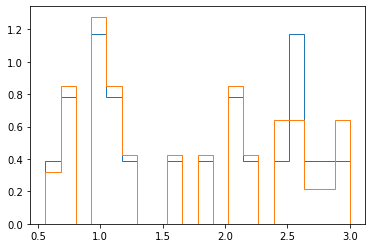

In [136]:
# test_df = pd.read_csv('/nobackup/c1029594/CANDELS_AGN_merger_data/agn_merger_output/photoz_TEST.csv')
ran_df = ran_df[ ran_df['kpc_sep'] < 20 ]
pairz = np.concatenate( (np.array(ran_df['prime_drawn_z']), np.array(ran_df['partner_drawn_z'])), axis=0 )
isoz =  np.concatenate( (np.array(ran_df['prime_control1_drawn_z']), np.array(ran_df['prime_control2_drawn_z']),
                       np.array(ran_df['partner_control1_drawn_z']), np.array(ran_df['partner_control2_drawn_z'])), axis=0 )
pairm = np.concatenate( (np.array(ran_df['prime_drawn_M']), np.array(ran_df['partner_drawn_M'])), axis=0 )
isom =  np.concatenate( (np.array(ran_df['prime_control1_drawn_M']), np.array(ran_df['prime_control2_drawn_M']),
                       np.array(ran_df['partner_control1_drawn_M']), np.array(ran_df['partner_control2_drawn_M'])), axis=0 )
x, bins, patches = plt.hist(pairz, bins=20, density=True, histtype='step')
plt.hist(isoz, bins=bins, density=True, histtype='step')
plt.show()

In [ ]:
ran_df2 = ran_df[ (ran_df['prime_drawn_LX'] > 42) ]
ran_df3 = ran_df[ (ran_df['partner_drawn_LX'] > 42) ]

ran_df4 = ran_df[ (ran_df['prime_control1_drawn_LX'] > 42) ]
ran_df5 = ran_df[ (ran_df['prime_control2_drawn_LX'] > 42) ]
ran_df6 = ran_df[ (ran_df['partner_control1_drawn_LX'] > 42) ]
ran_df7 = ran_df[ (ran_df['partner_control2_drawn_LX'] > 42) ]

# print(ran_df2['prime_index'])
# print(ran_df3['partner_index'])
# print(ran_df4['prime_control1_ID'])
# print(ran_df5['prime_control2_ID'])
# print(ran_df6['partner_control1_ID'])
# print(ran_df7['partner_control2_ID'])


## Galaxy property checks

In [18]:
# For a random single iteration, plot the distribution of mass in each bin

# generate a 2 random integers to look at distributions
idx = random.randint(len(os.listdir(data_path+'photo-specz_results/')), size=2)

# generate bins
max_dist = 100
n_bins = 8
bins, bin_all_pairfrac, bin_all_isofrac = make_bins(max_dist=max_dist, n_bins=n_bins)

# create dictionaries to store redshift and mass distributions
bin_AGN = {}
bin_pairfrac_mass = {}
bin_isofrac_mass = {}
bin_pairfrac_z = {}
bin_isofrac_z = {}

bin_pid = {}
bin_cid = {}
print(file)
it_df = pd.read_csv(data_path+'photo-specz_results/'+file)
it_df = it_df[ (it_df['field'] != 'GDS') & (it_df['prime_drawn_M'] > 9.5)  ]
    
# separate pairs into bins
for rnge in bins:
    # get bin ranges from bins dictionary entries
    info = bins[rnge].split('-')
    low = float(info[0])
    high = float(info[1])

    # sort into bins
    bin_df = it_df[ (it_df['kpc_sep'] > low) & (it_df['kpc_sep'] <= high) ]

    # print(len(bin_df[ (bin_df['prime_drawn_LX'] > 42) ]) , bin_df['prime_drawn_LX'].count())
    # print(len(bin_df[ (bin_df['partner_drawn_LX'] > 42) ]) , bin_df['partner_drawn_LX'].count())
    # print('-----')
    # print(len(bin_df[ (bin_df['prime_control1_drawn_LX'] > 42) ]), bin_df['prime_control1_drawn_LX'].count())
    # print(len(bin_df[ (bin_df['prime_control2_drawn_LX'] > 42) ]), bin_df['prime_control2_drawn_LX'].count())
    # print(len(bin_df[ (bin_df['partner_control1_drawn_LX'] > 42) ]), bin_df['partner_control1_drawn_LX'].count())
    # print(len(bin_df[ (bin_df['partner_control2_drawn_LX'] > 42) ]), bin_df['partner_control2_drawn_LX'].count())
    # print('----------------------')
    
    # get pair distributions for mass and redshift in each bin
    bin_pairfrac_mass['pair_mass_in_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_drawn_M']), 
                                                               np.array(bin_df.loc[:, 'partner_drawn_M'])), axis=0 )
    bin_pairfrac_z['pair_z_in_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_drawn_z']), 
                                                               np.array(bin_df.loc[:, 'partner_drawn_z'])), axis=0 )
    bin_isofrac_mass['iso_mass_in_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_control1_drawn_M']), 
                                                               np.array(bin_df.loc[:, 'prime_control2_drawn_M']),
                                                           np.array(bin_df.loc[:, 'partner_control1_drawn_M']),
                                                           np.array(bin_df.loc[:, 'partner_control2_drawn_M'])), axis=0 )
    bin_isofrac_z['iso_z_in_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_control1_drawn_z']), 
                                                               np.array(bin_df.loc[:, 'prime_control2_drawn_z']),
                                                           np.array(bin_df.loc[:, 'partner_control1_drawn_z']),
                                                           np.array(bin_df.loc[:, 'partner_control2_drawn_z'])), axis=0 )
    print(rnge)
    bin_pid['pid_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_index']), 
                                                               np.array(bin_df.loc[:, 'partner_index'])), axis=0 )
    bin_cid['cid_'+rnge] = np.concatenate( (np.array(bin_df.loc[:, 'prime_control1_ID']), 
                                                               np.array(bin_df.loc[:, 'prime_control2_ID']),
                                                           np.array(bin_df.loc[:, 'partner_control1_ID']),
                                                           np.array(bin_df.loc[:, 'partner_control2_ID'])), axis=0 )


ValueError: too many values to unpack (expected 3)

In [17]:
len(bin_df['partner_control1_ID'])

105

In [195]:
aa = np.array(bin_df.loc[bin_df['field'] == 'GDS', 'prime_index'])
print(aa)

[   36  1270  1316  1342  1357  1542  1670  1802  2253  2393  2420  2712
  3305  4357  4386  4916  5023  5891  5914  6364  6431  6514  6876  6902
  7030  7097  7155  7264  7343  7511  7730  7919  8138  8190  9840 10269
 10615 10718 10923 11073 11116 11343 12085 13479 13858 14076 14107 14629
 14854 14927 15123 15139 15422 15552 15811 15911 15943 16212 16222 16851
 16894 16951 17207 17286 17380 17426 17466 17574 18964]


In [196]:
bb = np.array(bin_df.loc[bin_df['field'] == 'GDS', 'prime_control1_ID'])

cc = np.array(bin_df.loc[bin_df['field'] == 'GDS', 'partner_control1_ID'])

In [197]:
# check for duplicate indices
for idx in aa:
    if idx in bb or idx in cc:
        print('oops')

In [198]:
pmass = [ (bin_pairfrac_mass[col]) for col in bin_pairfrac_mass]
pz = [ (bin_pairfrac_z[col]) for col in bin_pairfrac_z]
imass = [ (bin_isofrac_mass[col])[~np.isnan(bin_isofrac_mass[col])] for col in bin_isofrac_mass]
iz = [ (bin_isofrac_z[col])[~np.isnan(bin_isofrac_z[col])] for col in bin_isofrac_z]

# make position vector
kpc_meds = [ ( ( float((bins[key].split('-'))[0]) + float((bins[key].split('-'))[1]) ) / 2 ) for key in bins ]

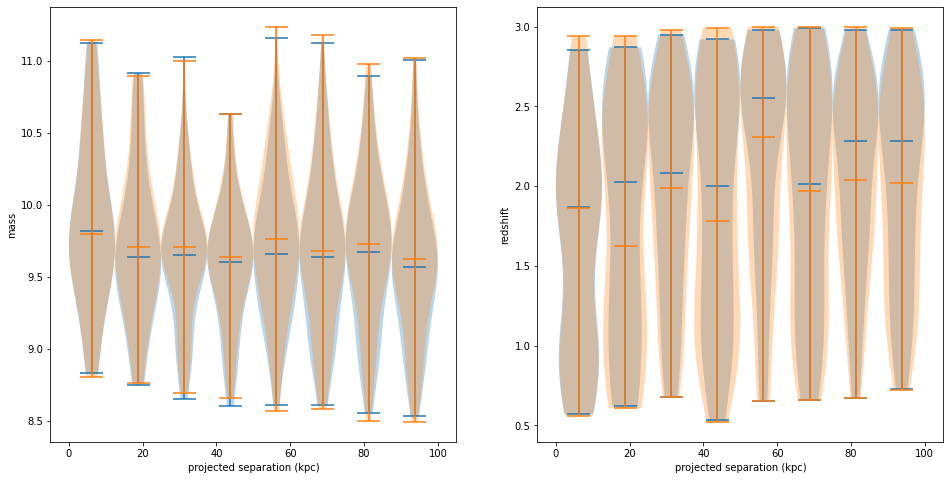

In [199]:
# make violin plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].violinplot(pmass, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[0].violinplot(imass, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
# axs[0].set_title('Results', fontsize=20)
axs[0].axis(xmin=-5,xmax=105)
axs[0].set_xlabel('projected separation (kpc)')
axs[0].set_ylabel('mass')

axs[1].violinplot(pz, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[1].violinplot(iz, kpc_meds, points=100, widths=vwidth, showmeans=False,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[1].axis(xmin=-5,xmax=105)
axs[1].set_xlabel('projected separation (kpc)')
axs[1].set_ylabel('redshift')

plt.show()


## Calculate AGN fractions

In [87]:
# create bins
max_dist = 100
n_bins = 8
bins, bin_all_pairfrac, bin_all_isofrac, bin_AGN_count, bin_gal_count = make_bins(max_dist=max_dist, n_bins=n_bins)

# define X-ray luminosity AGN limit
LX_AGN = 42

# create dictionaries to store AGN fractions
bin_AGN = {}
bin_pairfrac = {}
bin_isofrac = {}

# read through all the iteration files
for file in tqdm(os.listdir(data_path+'specz_results/')):
    it_df = pd.read_csv(data_path+'specz_results/'+file)
    it_df = it_df[ (it_df['prime_drawn_M'] > 10) & (it_df['prime_drawn_z'] < 2.5) ]#& (it_df['field'] == 'GDS') ]
        
    # separate pairs into bins
    for rnge in bins:
        # get bin ranges from bins dictionary entries
        info = bins[rnge].split('-')
        low = float(info[0])
        high = float(info[1])
        
        # sort into bins
        bin_df = it_df[ (it_df['kpc_sep'] > low) & (it_df['kpc_sep'] <= high) ]
        
        # print(len(bin_df[ (bin_df['prime_drawn_LX'] > LX_AGN) ]) , bin_df['prime_drawn_LX'].count())
        # print(len(bin_df[ (bin_df['partner_drawn_LX'] > LX_AGN) ]) , bin_df['partner_drawn_LX'].count())
        # print('-----')
        # print(len(bin_df[ (bin_df['prime_control1_drawn_LX'] > LX_AGN) ]), bin_df['prime_control1_drawn_LX'].count())
        # print(len(bin_df[ (bin_df['prime_control2_drawn_LX'] > LX_AGN) ]), bin_df['prime_control2_drawn_LX'].count())
        # print(len(bin_df[ (bin_df['partner_control1_drawn_LX'] > LX_AGN) ]), bin_df['partner_control1_drawn_LX'].count())
        # print(len(bin_df[ (bin_df['partner_control2_drawn_LX'] > LX_AGN) ]), bin_df['partner_control2_drawn_LX'].count())
        # print('----------------------')
        
        
        # print(np.array(bin_df.loc[ (bin_df['prime_drawn_LX'] > LX_AGN), 'prime_cat_ID' ]))
        # print(np.array(bin_df.loc[ (bin_df['partner_drawn_LX'] > LX_AGN), 'partner_cat_ID']) )
        # print('-----')
        # print(np.array(bin_df.loc[ (bin_df['prime_control1_drawn_LX'] > LX_AGN), 'prime_control1_cat_ID' ]))
        # print(np.array(bin_df.loc[ (bin_df['prime_control2_drawn_LX'] > LX_AGN), 'prime_control2_cat_ID' ]))
        # print(np.array(bin_df.loc[ (bin_df['partner_control1_drawn_LX'] > LX_AGN), 'partner_control1_cat_ID' ]))
        # print(np.array(bin_df.loc[ (bin_df['partner_control2_drawn_LX'] > LX_AGN), 'partner_control2_cat_ID' ]))
        # print('----------------------')
        
        
        # calculate the AGN fraction in that bin and append it to same calculation accross iteration
        bin_pairfrac[bins[rnge]] = ((  len(bin_df[ (bin_df['prime_drawn_LX'] > LX_AGN) ]) +
                                             len(bin_df[ (bin_df['partner_drawn_LX'] > LX_AGN) ])
                                            ) /
                                            (  bin_df['prime_drawn_LX'].count() +
                                             bin_df['partner_drawn_LX'].count()
                                            ))
        bin_all_pairfrac[bins[rnge]].append(bin_pairfrac[bins[rnge]])

        
        bin_isofrac[bins[rnge]] = ((  len(bin_df[ (bin_df['prime_control1_drawn_LX'] > LX_AGN) ] ) +
                                            len(bin_df[ (bin_df['prime_control2_drawn_LX'] > LX_AGN) ]) +
                                            len(bin_df[ (bin_df['partner_control1_drawn_LX'] > LX_AGN) ]) +
                                            len(bin_df[ (bin_df['partner_control2_drawn_LX'] > LX_AGN) ]) 
                                           ) /
                                            (  bin_df['prime_control1_drawn_LX'].count() +
                                             bin_df['prime_control2_drawn_LX'].count() +
                                             bin_df['partner_control1_drawn_LX'].count() +
                                             bin_df['partner_control2_drawn_LX'].count() ))
        bin_all_isofrac[bins[rnge]].append(bin_isofrac[bins[rnge]])
        
        # store simple counts
        bin_AGN_count[bins[rnge]].append(len(bin_df[ (bin_df['prime_drawn_LX'] > LX_AGN) ]) +
                                             len(bin_df[ (bin_df['partner_drawn_LX'] > LX_AGN) ]))
        
        bin_gal_count[bins[rnge]].append(bin_df['prime_drawn_LX'].count() +
                                             bin_df['partner_drawn_LX'].count())

100%|██████████| 1/1 [00:00<00:00, 25.99it/s]


In [88]:
def make_bins(max_dist=100, n_bins=10):

    bin_all_AGNfrac = {}
    bin_all_isofrac = {}
    
    # create dictionaries to store AGN and pair galaxy counts -> just for paried galaxies (controls later)
    bin_AGN_count = {}
    bin_gal_count = {}

    # create bin sizes
    all_bins = {}
    for bn in range(0, n_bins):
        # define limits for each bin
        all_bins[str(bn)] = str((max_dist/n_bins)*bn)+'-'+str((max_dist/n_bins)+(max_dist/n_bins)*bn)
        # define empty lists to later append AGN fractions to
        bin_all_AGNfrac[all_bins[str(bn)]] = []
        bin_all_isofrac[all_bins[str(bn)]] = []
        bin_AGN_count[all_bins[str(bn)]] = []
        bin_gal_count[all_bins[str(bn)]] = []
        
    
    return all_bins, bin_all_AGNfrac, bin_all_isofrac, bin_AGN_count, bin_gal_count

In [89]:
# create dataframes from the dictionaries:
pAGNf_df = pd.DataFrame.from_dict(bin_all_pairfrac)
iAGNf_df = pd.DataFrame.from_dict(bin_all_isofrac)

In [90]:
pAGNf_df.describe()

,0.0-12.5,12.5-25.0,25.0-37.5,37.5-50.0,50.0-62.5,62.5-75.0,75.0-87.5,87.5-100.0
count,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0
mean,0.083333,0.214286,0.142857,0.0,0.0,0.0,0.166667,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.083333,0.214286,0.142857,0.0,0.0,0.0,0.166667,0.0
25%,0.083333,0.214286,0.142857,0.0,0.0,0.0,0.166667,0.0
50%,0.083333,0.214286,0.142857,0.0,0.0,0.0,0.166667,0.0
75%,0.083333,0.214286,0.142857,0.0,0.0,0.0,0.166667,0.0
max,0.083333,0.214286,0.142857,0.0,0.0,0.0,0.166667,0.0


In [91]:
iAGNf_df.describe()

,0.0-12.5,12.5-25.0,25.0-37.5,37.5-50.0,50.0-62.5,62.5-75.0,75.0-87.5,87.5-100.0
count,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.0,0.041667,0.083333,0.071429,0.103448,0.083333,0.222222,0.086957
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.041667,0.083333,0.071429,0.103448,0.083333,0.222222,0.086957
25%,0.0,0.041667,0.083333,0.071429,0.103448,0.083333,0.222222,0.086957
50%,0.0,0.041667,0.083333,0.071429,0.103448,0.083333,0.222222,0.086957
75%,0.0,0.041667,0.083333,0.071429,0.103448,0.083333,0.222222,0.086957
max,0.0,0.041667,0.083333,0.071429,0.103448,0.083333,0.222222,0.086957


In [92]:
### photo ###
#0.030469	0.017197	0.014310	0.017071	0.017050	0.012333	0.014314	0.011376
### photo+spec ###
#0.024890	0.015904	0.012903	0.014925	0.016148	0.011903	0.013837	0.010741

(0.0, 0.2)

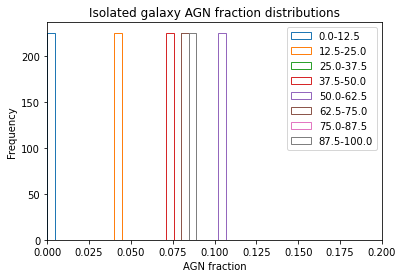

In [93]:
# plot distributions
iAGNf_df.plot.hist(bins=50, histtype='step', density=True)

plt.title('Isolated galaxy AGN fraction distributions')
plt.xlabel('AGN fraction')
plt.xlim(0, 0.2)

(0.0, 0.2)

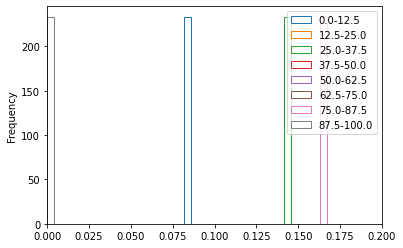

In [94]:
pAGNf_df.plot.hist(bins=50, histtype='step', density=True)
plt.xlim(0, 0.20)

In [95]:
### should double check the movement of all this data

In [96]:
# make AGN fraction vectors
pdata = [pAGNf_df[col] for col in pAGNf_df]
idata = [iAGNf_df[col] for col in pAGNf_df]

# make position vector
kpc_meds = [ ( ( float((bins[key].split('-'))[0]) + float((bins[key].split('-'))[1]) ) / 2 ) for key in bins ]

# define violin plot width
vwidth = float((bins['bin0'].split('-'))[1]) - float((bins['bin0'].split('-'))[0])

# make an AGN enhancment vector
AGN_enh = [(pdata[i] / idata[i]) for i in range(0, len(pdata))]

# should make some dynamic vector in case I want to increase pair sample out to 150 kpc or something

KeyError: 'bin0'

/home/c1029594/virtualenv/3.6.9/lib/python3.6/site-packages/numpy/core/function_base.py:144: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/c1029594/virtualenv/3.6.9/lib/python3.6/site-packages/numpy/lib/function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/c1029594/virtualenv/3.6.9/lib/python3.6/site-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/c1029594/virtualenv/3.6.9/lib/python3.6/site-packages/matplotlib/mlab.py:1105: RuntimeWarning: invalid value encountered in subtract
  diff = self.dataset - points[:, i, np.newaxis]


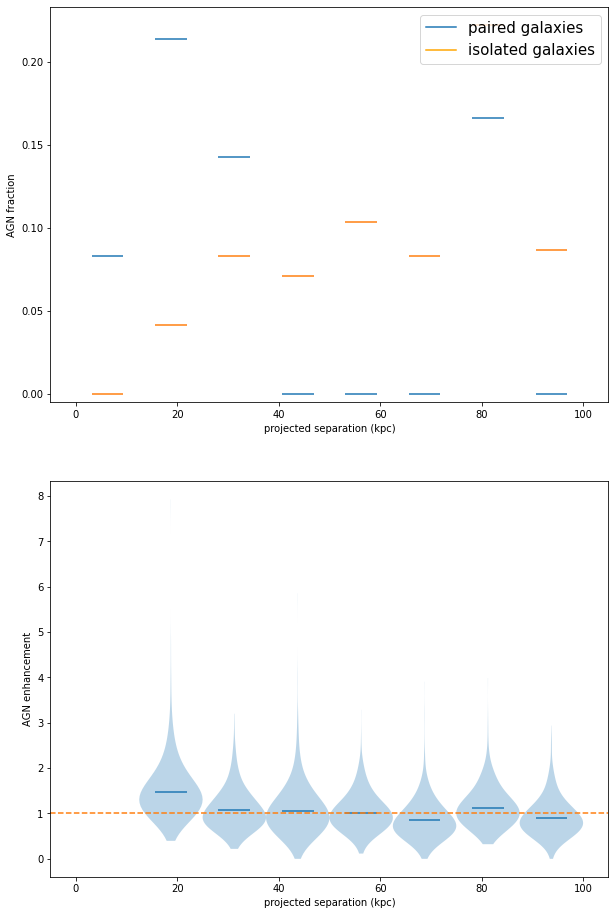

In [97]:
# make violin plots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 16))
axs[0].violinplot(pdata, kpc_meds, points=100, widths=vwidth, showmeans=True,
                     showextrema=False, showmedians=False, bw_method=0.5)
axs[0].violinplot(idata, kpc_meds, points=100, widths=vwidth, showmeans=True,
                     showextrema=False, showmedians=False, bw_method=0.5)
# axs[0].set_title('Results', fontsize=20)
axs[0].axis(xmin=-5,xmax=105)
axs[0].axis(ymin=-0.005)
axs[0].set_xlabel('projected separation (kpc)')
axs[0].set_ylabel('AGN fraction')
axs[0].plot([-10,-10], color='#1f77b4', label='paired galaxies')
axs[0].plot([-10,-10], color='orange', label='isolated galaxies')
axs[0].legend(fontsize=15)

axs[1].violinplot(AGN_enh, kpc_meds, points=100, widths=vwidth, showmeans=True,
                     showextrema=False, showmedians=False, bw_method=0.5)
axs[1].plot([-5,105], [1,1], linestyle='--')
axs[1].axis(xmin=-5,xmax=105)
axs[1].set_xlabel('projected separation (kpc)')
axs[1].set_ylabel('AGN enhancement')

plt.show()



In [61]:
# show average out counts from the bins and output as a simple df
for rnge in bins:
    bin_AGN_count[str(rnge)] = [np.mean(bin_AGN_count[str(rnge)])]
    bin_gal_count[str(rnge)] = [np.mean(bin_gal_count[str(rnge)])]
# print(bin_gal_count)
AGN_count_df = pd.DataFrame.from_dict(bin_AGN_count)
gal_count_df = pd.DataFrame.from_dict(bin_gal_count)
df = pd.concat([AGN_count_df,gal_count_df], ignore_index = True, axis=0)
df

,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7
0,3.873,9.199,6.855,6.122,8.902,6.396,9.853,7.186
1,59.126,137.312,153.884,145.986,177.728,191.934,201.368,225.224


In [49]:
# right now there is not evidence for AGN enhancement
# a few things:
## write code to account for pairs where a partner falls below a mass limit
### simply just say that the prime needs to be greater that 8.5, and any partner needs to be within a mass ratio limit

## seal with duplicate issue where mass ratio = 0, currently some unaccounted for duplicates

## control sampe not exactly representative of the pair sample

## currently, we are using zhi and low values for the mFDa approach, which is not consistent with the draws
### additionally, these are 68% confidence intervals
### will be solved when Dale sends more data
#   - could try making the dz threshold lower
#   - why are the pairs at higher z than expected?
#   - could be the result of poor zhi / zlow cuts (could run one iteration to find out

## could be worth correcting all of the pd warnings now that I fully understand loc...
#   - thought I fixed this but nope

## galaxy duplicate issue in counting AGN -> should be fixed in this code ^
#   - okay but don't we want to not do this before making bin cuts? perhaps it is just safest to select the closest pair
#   - in binning the prime galaxy and include the partner galaxies where in their own bins?
#   - ask Chris what we should do


# let's say the current version of the code is version 1.0
# these tasts will be implemented as different versions


In [103]:
# major issue now is that ID's appear in both the pair and control samples
# could be due to missuse of loc and iloc
# incorrect definitions for pair_df or iso_df